This data is from the National Science Foundation 2019 National Survey of College Graduates found at https://ncsesdata.nsf.gov/datadownload/index.html?survey=PCG2019&type=data. Methods of data collection and other information can be found here: https://ncses.nsf.gov/pubs/nsf22310.

<h2>Background</h2>

<h6>Data</h6>
    
<p>The data analyzed are from the National Science Foundation's 2019 National Survey of College Graduates (NSCG). This survey includes people residing in the U.S. who earned a bachelor’s degree or higher prior to 1 January 2018. There are 92,382 data points in the dataset. For this analysis, I indcluded only those people for whom a bachelor's degree was their highest degree earned. This subset includes 38,321 data points.</p>
    
<h6>Goal</h6>

<p>The cost of a college education has increased by 180% since 1980. In 2019, a college student could expect to pay an average of $30,000 per year to attend college. Knowledge about the return on the investment in college can help students better choose a major and subsequent career.</p>

<h6>Methods</h6>

<p>I analyzed the NSCG data to uncover which college majors lead to employment within the field of the major without earning additional degrees. I then determined which job fields have the highest job satisfaction and salaries, and created a subset of jobs that maximize both. I then summaried the undergraduate majors of those highly satisfying and well-paying jobs.
</p>

------------------------------------------------------------------------------------------

In [2]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import copy
import sys
!{sys.executable} -m pip install scipy
import scipy as sp
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [219]:
#import primary data from csv
#nscg_orig = pd.read_csv(r'C:\Users\Tracie\OneDrive\1-Data Analytics\SpringBoard\Unit 15\Capstone 2\EPCG19\epcg19.csv')

In [3]:
#import created dataframe with codes
nscg_orig = pd.read_csv(r'C:\Users\Tracie\OneDrive\1-Data Analytics\SpringBoard\Unit 15\Capstone 2\EPCG19\nscg_orig.csv')

In [4]:
#import codes from csv
degree_codes = pd.read_csv(r'C:\Users\Tracie\OneDrive\1-Data Analytics\SpringBoard\Unit 15\Capstone 2\EPCG19\degree_codes.csv')
job_codes = pd.read_csv(r'C:\Users\Tracie\OneDrive\1-Data Analytics\SpringBoard\Unit 15\Capstone 2\EPCG19\job_codes.csv')
job_codes_minor = pd.read_csv(r'C:\Users\Tracie\OneDrive\1-Data Analytics\SpringBoard\Unit 15\Capstone 2\EPCG19\job_codes_minor.csv')
field_study_major = pd.read_csv(r'C:\Users\Tracie\OneDrive\1-Data Analytics\SpringBoard\Unit 15\Capstone 2\EPCG19\field_study_major.csv')
field_study_minor = pd.read_csv(r'C:\Users\Tracie\OneDrive\1-Data Analytics\SpringBoard\Unit 15\Capstone 2\EPCG19\field_study_minor.csv')

------------------------------------------------------------------------------------------

<h2>Data Cleansing</h2>

In [221]:
#examine nscg data
print(nscg_orig.head()) # show first 5 rows
print(nscg_orig.tail()) # last 5 rows
print(nscg_orig.columns) # list all column names
print('The dataframe has {} rows and {} columns: '.format(nscg_orig.shape[0], nscg_orig.shape[1])) # get number of rows and columns
print(nscg_orig.info()) # additional info about dataframe
print(nscg_orig.isna().sum())

   Unnamed: 0  IDNUM  AGE  BAACYR                 BACARN  \
0           0      1   36    2004        Liberal Arts II   
1           1      2   38    2000         Liberal Arts I   
2           2      3   42    1999  Research University I   
3           3      4   48    1996   Doctorate Granting I   
4           4      5   37    2003  Research University I   

                 BAPBPR         DGRDG  DGRYR  \
0  Privately controlled      Master's   2007   
1  Privately controlled      Master's   2008   
2  Privately controlled      Master's   2016   
3   Publicly controlled      Master's   1993   
4   Publicly controlled  Professional   2008   

                                    EMSECDT            EMSECSM  ...  \
0                       Bus/Ind, for-profit  Business/Industry  ...   
1  Bus/Ind, self-employed, not-incorporated  Business/Industry  ...   
2                       Bus/Ind, for-profit  Business/Industry  ...   
3                       Bus/Ind, for-profit  Business/Industry  ..

Unnamed: 0        0
IDNUM             0
AGE               0
BAACYR            0
BACARN        17926
BAPBPR        17926
DGRDG             0
DGRYR             0
EMSECDT       14420
EMSECSM       14420
HDACYR            0
JOBSATIS      14420
LFSTAT            0
N2BAMED           0
N2DGRMED          0
N2OCPRMG      14420
N3OCPR            0
N3OCPRNG          0
NBAMEBG        5236
NBAMEMG        5236
NBAMENG           0
NDGMEMG           0
NDGMENG           0
NRREA         82052
OCEDRLP       14420
SALARY            0
code              0
N2BAMED_D      6448
N2DGRMED_D     1934
N3OCPR_D      29275
N3OCPRNG_D    12221
NBAMENG_D      5236
NDGMEMG_D         0
NDGMENG_D         0
dtype: int64


------------------------------------------------------------------------------------------

In [29]:
#replacing codes with data
#N2BAMED - copy column and call it 'code'
nscg_orig['code'] = nscg_orig['N2BAMED']

#replace code with description
nscg_1 = pd.merge(nscg_orig,
                     degree_codes,
                     on ='code',
                     how ='left')
#rename column
nscg_1.rename(columns={'description': 'N2BAMED_D'}, inplace=True)


#N2DGRMED - copy column and call it 'code'
nscg_orig['code'] = nscg_orig['N2DGRMED']

#replace code with description
nscg_2 = pd.merge(nscg_orig,
                     degree_codes,
                     on ='code',
                     how ='left')
#rename column
nscg_2.rename(columns={'description': 'N2DGRMED_D'}, inplace=True)


#N3OCPR - copy column and call it 'code'
nscg_orig['code'] = nscg_orig['N3OCPR']

#replace code with description
nscg_3 = pd.merge(nscg_orig,
                     job_codes,
                     on ='code',
                     how ='left')
#rename column
nscg_3.rename(columns={'description': 'N3OCPR_D'}, inplace=True)


#N3OCPRNG - copy column and call it 'code'
nscg_orig['code'] = nscg_orig['N3OCPRNG']

#replace code with description
nscg_4 = pd.merge(nscg_orig,
                     job_codes_minor,
                     on ='code',
                     how ='left')
#rename column
nscg_4.rename(columns={'description': 'N3OCPRNG_D'}, inplace=True)


#NBAMENG - copy column and call it 'code'
nscg_orig['code'] = nscg_orig['NBAMENG']

#replace code with description
nscg_5 = pd.merge(nscg_orig,
                     field_study_minor,
                     on ='code',
                     how ='left')
#rename column
nscg_5.rename(columns={'description': 'NBAMENG_D'}, inplace=True)


#NDGMEMG - copy column and call it 'code'
nscg_orig['code'] = nscg_orig['NDGMEMG']

#replace code with description
nscg_6 = pd.merge(nscg_orig,
                     field_study_major,
                     on ='code',
                     how ='left')
#rename column
nscg_6.rename(columns={'description': 'NDGMEMG_D'}, inplace=True)


#NDGMENG - copy column and call it 'code'
nscg_orig['code'] = nscg_orig['NDGMENG']

#replace code with description
nscg_7 = pd.merge(nscg_orig,
                     job_codes_minor,
                     on ='code',
                     how ='left')

#rename column
nscg_7.rename(columns={'description': 'NDGMENG_D'}, inplace=True)

print(nscg_orig.shape) #check to make sure 7 new columns are there 

#Note: I used this code to append each column to the orignal data one at a time
#nscg_orig['N3OCPR_D'] = nscg_3['N3OCPR_D']

(92537, 33)


In [222]:
#save dataframe with codes to csv
#nscg_orig.to_csv(r'C:\Users\Tracie\OneDrive\1-Data Analytics\SpringBoard\Unit 15\Capstone 2\EPCG19\nscg_orig.csv')

In [5]:
#strip lead and trailing spaces in OCEDRLP
nscg_orig['OCEDRLP'] = nscg_orig['OCEDRLP'].str.strip()

------------------------------------------------------------------------------------------

<h2>Which majors lead to working at a job related to undergraduate major?</h2>

<Figure size 720x720 with 0 Axes>

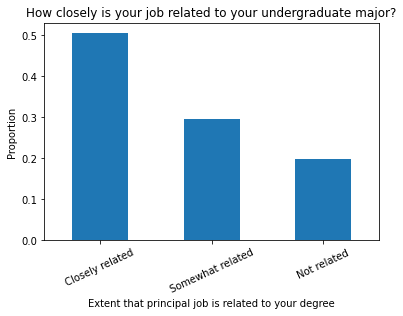

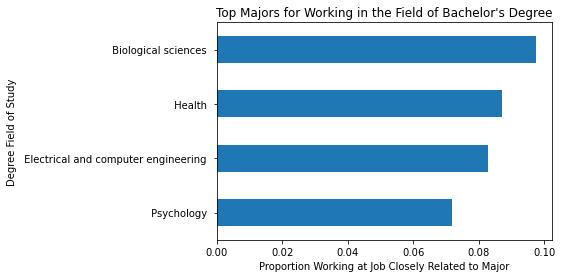

In [9]:
#subset data to include only those whose highest degree is Bachelor's
nscg_bachelor = nscg_orig[nscg_orig["DGRDG"] == "Bachelor's"]
nscg_bachelor = nscg_bachelor[(nscg_bachelor['SALARY'] < 9999998) & (nscg_bachelor['SALARY'] != 0)]
#nscg_bachelor.drop(labels='Unnamed: 0', axis=1, inplace=True)

#save dataframe with codes to csv
#nscg_bachelor.to_csv(r'C:\Users\Tracie\OneDrive\1-Data Analytics\SpringBoard\Unit 15\Capstone 2\EPCG19\nscg_bachelor.csv')

#how closely is job related to major for bachelor's group
job_rel = nscg_bachelor['OCEDRLP'].value_counts(normalize=True, sort=True) #get proportions

#plot frequencies
plt.figure(figsize=(10,10))
fig, ax = plt.subplots()
job_rel.plot(kind='bar')
ax.set_xlabel('Extent that principal job is related to your degree')
ax.set_ylabel('Proportion')
ax.set_xticklabels(job_rel.index, rotation=25)
ax.set_title('How closely is your job related to your undergraduate major?')
plt.show()

#Subset data for closely releated only
nscg_related = nscg_orig[nscg_orig["OCEDRLP"] == "Closely related"]

#For 'closely related' group, show major field of study
major_rel = nscg_related['NBAMENG_D'].value_counts(normalize=True, ascending=True)
df_major_rel = pd.DataFrame(major_rel) #convert to dataframe
df_major_rel = df_major_rel.reset_index() #reset index
df_major_rel.columns = ['field_of_study', 'percent'] # change column names
major_rel_top = df_major_rel[df_major_rel['percent'] >= 0.067] #subset data

#plot proportions
major_rel_top.plot.barh('field_of_study', 'percent', legend=None)
plt.title("Top Majors for Working in the Field of Bachelor's Degree")
plt.xlabel('Proportion Working at Job Closely Related to Major')
plt.ylabel('Degree Field of Study')
plt.show()

------------------------------------------------------------------------------------------

<p><b>Insights:</b></p>
<p>Almost 50% of the respondents with only a bachelor's degree said they were working in a field that was closely related to the field of their degree. Of those respondents, 31% were in some sort of engineering field, while 17% majored in non-science and engineering fields. A finer breakdown of majors reveals that those majoring in health-related fields have the highest proportion employed in a field that is closely related to their major, followed closely by those majoring in electrical and computer engineering, computer and informational sciences, mechanical engineering, and biological sciences.</p>

------------------------------------------------------------------------------------------

<h2>Which job field lead to jobs with the highest job satisfaction?<h2>

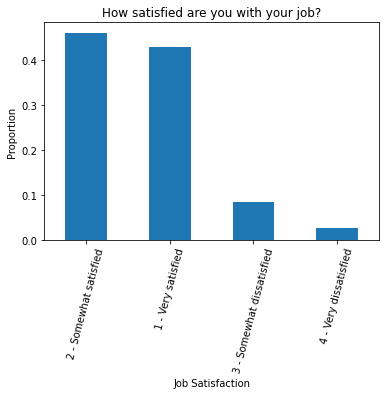

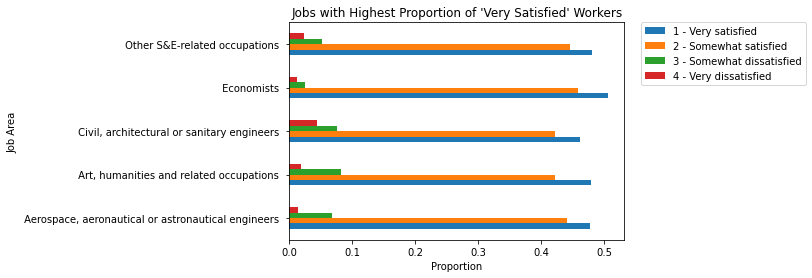

In [15]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

#re-code job satisfaction for sorting
#nscg_bachelor['JOBSATIS'] = nscg_bachelor['JOBSATIS'].replace(to_replace='Very satisfied', value='1-Very satisfied')
#nscg_bachelor['JOBSATIS'] = nscg_bachelor['JOBSATIS'].replace(to_replace='Somewhat satisfied', value='2-Somewhat satisfied')
#nscg_bachelor['JOBSATIS'] = nscg_bachelor['JOBSATIS'].replace(to_replace='Somewhat dissatisfied', value='3-Somewhat dissatisfied')
#nscg_bachelor['JOBSATIS'] = nscg_bachelor['JOBSATIS'].replace(to_replace='Very dissatisfied', value='4-Very dissatisfied')

#Overall job satisfaction summary
job_sat = nscg_bachelor['JOBSATIS'].value_counts(normalize=True, sort=True) #get proportions

#plot frequencies
fig, ax = plt.subplots()
job_sat.plot(kind='bar')
ax.set_xlabel('Job Satisfaction')
ax.set_ylabel('Proportion')
ax.set_xticklabels(job_sat.index, rotation=75)
ax.set_title('How satisfied are you with your job?')
plt.show()

#cross tab of job and job satisfaction
ct_satis = pd.crosstab(index = nscg_bachelor.N3OCPRNG_D, columns = nscg_bachelor.JOBSATIS, 
                       rownames=['Job Area'], colnames=['Job Satisfaction'], normalize='index')

#subset data
ct_satis_top = ct_satis[ct_satis['1 - Very satisfied'] >= 0.46] #filter

#plot jobs with top satisfaction
ct_satis_top.plot.barh()
plt.title("Jobs with Highest Proportion of 'Very Satisfied' Workers")
plt.xlabel('Proportion')
plt.ylabel('Job Area')
#arranging legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0) #add legend outside plot
plt.show()


------------------------------------------------------------------------------------------

<p><b>Insights:</b></p>
<p>The vast majority of working people obtaining bachelor's degrees that were surveyed are satisfied with their job. The five jobs with the greatest proportion of people reporting that they were very satisfied included physical scientists, non science and engineering post-secondary teachers, electrical or computer hardware engineers, earth, atmospheric, and ocean scientists, and chemical engineers. </p>

------------------------------------------------------------------------------------------

<h2>Which job fields have the highest salaries?</h2>

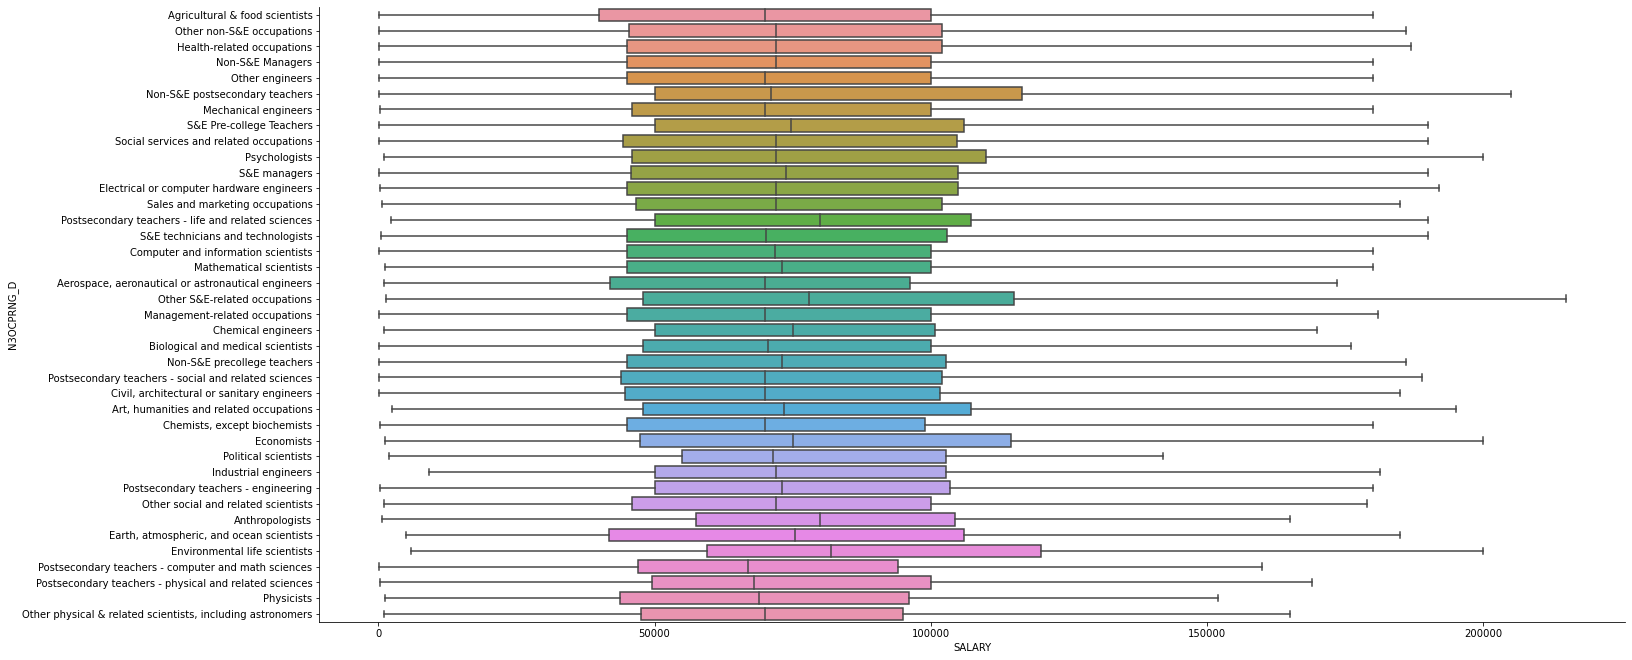

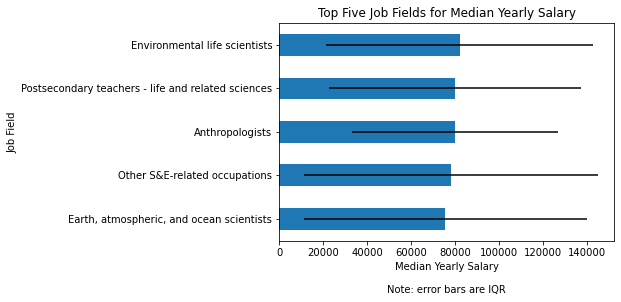

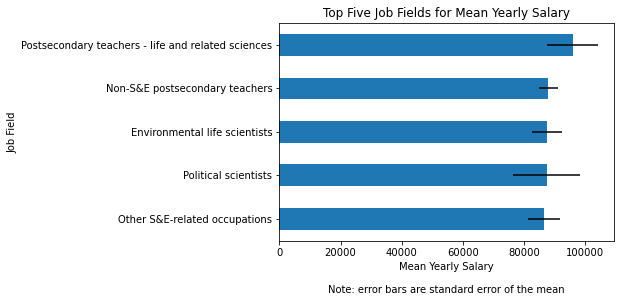

In [18]:
#strip lead and trailing spaces in N3OCPRNG_D
nscg_bachelor['N3OCPRNG_D'] = nscg_bachelor['N3OCPRNG_D'].str.strip()

#filter erroneous values from dataset, reset index, and drop extra columns
nscg_bachelor_1 = nscg_bachelor[(nscg_bachelor['SALARY'] < 9999998) & (nscg_bachelor['SALARY'] != 0)]
nscg_bachelor_1.reset_index(inplace = True)
nscg_bachelor_1.set_index('IDNUM')
nscg_bachelor_1.drop(labels=['index', 'Unnamed: 0.1',], axis=1, inplace=True)

#boxplot
nscg_bachelor_sorted = nscg_bachelor_1.sort_values('SALARY', ascending=False)
nscg_bachelor_sorted.reset_index(drop = True, inplace = True)
g = sns.catplot(x='SALARY', y='N3OCPRNG_D',
                data=nscg_bachelor_sorted, kind='box', sym='')
g.fig.set_figwidth(250)
g.fig.set_figheight(10)
plt.show()

#get median salaries by job code with IQR and place in dataframe
nscg_bach_agg = nscg_bachelor_1.groupby('N3OCPRNG_D')['SALARY'].agg([np.median, stats.iqr]) #iqr is from scipy
df_nscg_bach_agg = pd.DataFrame(nscg_bach_agg) #convert to dataframe
df_nscg_bach_agg = df_nscg_bach_agg.reset_index() #reset index
df_nscg_bach_agg.columns = ['job_field', 'median', 'iqr'] # change column names

#subset data to show top 5
nscg_bach_top = df_nscg_bach_agg.nlargest(n=5, columns=['median'])

# create bar graph of median and IQR for top 5
nscg_bach_top_sort = nscg_bach_top.sort_values('median', ascending=True)
nscg_bach_top_sort.plot.barh('job_field', 'median', xerr='iqr', legend=None)
plt.title('Top Five Job Fields for Median Yearly Salary')
plt.xlabel('''Median Yearly Salary

Note: error bars are IQR''')
plt.ylabel('Job Field')
plt.show()

#get mean salaries by job code with stderr and place in dataframe
nscg_bach_agg_m = nscg_bachelor_1.groupby('N3OCPRNG_D')['SALARY'].agg([np.mean, stats.sem]) #sem is from scipy
df_nscg_bach_agg_m = pd.DataFrame(nscg_bach_agg_m) #convert to dataframe
df_nscg_bach_agg_m = df_nscg_bach_agg_m.reset_index() #reset index
df_nscg_bach_agg_m.columns = ['job_field', 'mean', 'stderr'] # change column names

#subset data to show top 5
nscg_bach_top_m = df_nscg_bach_agg_m.nlargest(n=5, columns=['mean'])

# create bar graph of mean and stderr for top 5
nscg_bach_top_m_sort = nscg_bach_top_m.sort_values('mean', ascending=True)
nscg_bach_top_m_sort.plot.barh('job_field', 'mean', xerr='stderr', legend=None)
plt.title('Top Five Job Fields for Mean Yearly Salary')
plt.xlabel('''Mean Yearly Salary

Note: error bars are standard error of the mean''')
plt.ylabel('Job Field')
plt.show()

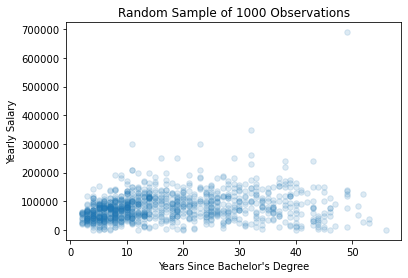

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 SALARY   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     1457.
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          6.51e-313
Time:                        13:17:11   Log-Likelihood:            -4.7454e+05
No. Observations:               38230   AIC:                         9.491e+05
Df Residuals:                   38228   BIC:                         9.491e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.465e+04    528.821    122.257      0.000    6.36e+04    6.57e+04
years_degree   938.1521     24.577     38.171      0.000     889.980     986.324
==============================================================================
Omnibus:                    33930.396   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2024222.786
Skew:                           4.050   Prob(JB):                         0.00
Kurtosis:                      37.716   Cond. No.                         37.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [140]:
#calculate years since degree
nscg_bachelor_1['years_degree'] = 2019 - nscg_bachelor_1['DGRYR']

# Sample 1000 random lines
df_sample=nscg_bachelor_1.sample(1000)
 
# make the scatter plot
plt.scatter(df_sample['years_degree'], df_sample['SALARY'], alpha=0.15, marker='o', s = 30)
plt.title('Random Sample of 1000 Observations')
plt.xlabel("Years Since Bachelor's Degree")
plt.ylabel("Yearly Salary")
plt.show()

#linear regression
#independent variables data frame
ind_var_raw = nscg_bachelor_1['years_degree']

#dependent variables data frame
dep_var_raw = nscg_bachelor_1['SALARY']

#add constant to correct for bias
ind_var_raw = sm.add_constant(ind_var_raw)

#fit regression model
regression_model_raw = sm.OLS(dep_var_raw,ind_var_raw).fit() 

#get summary of regression analysis
display(regression_model_raw.summary())

------------------------------------------------------------------------------------------

<p><b>Insights:</b></p>
<p> One variable that could cause variation in the salary data is variation in the number of years worked, as people with more experience might earn higher salaries. I tested this hypothesis with a linear regression and found that the number of years since earning the bachelo's degree does not account for a very substantial amount of the variation in salary (R-squared = 0.037).</p>

------------------------------------------------------------------------------------------

<h2>Putting it all together</h2>

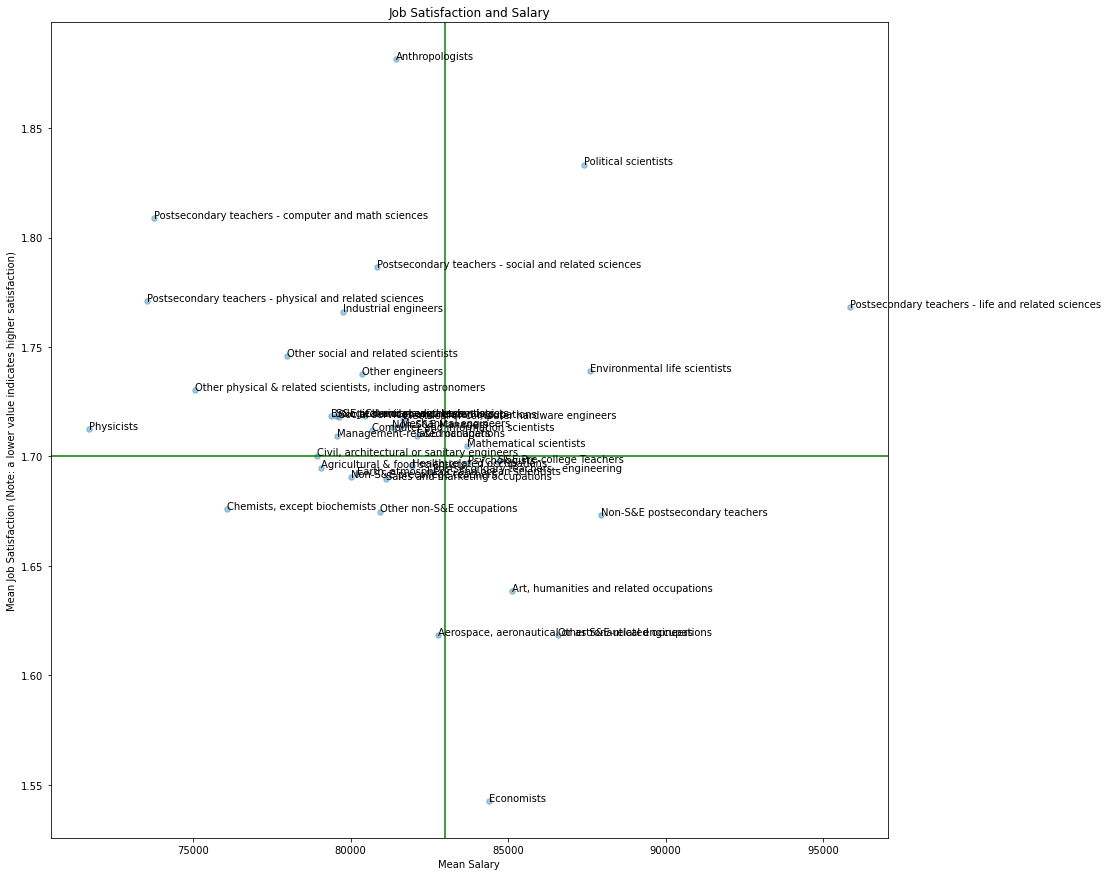

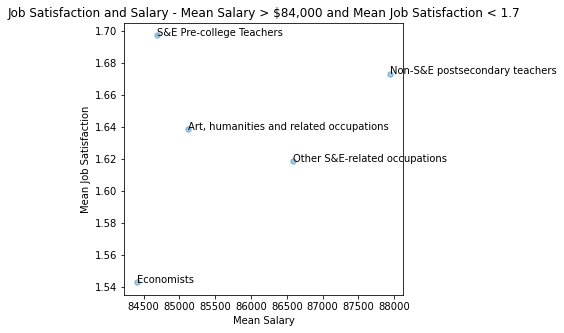

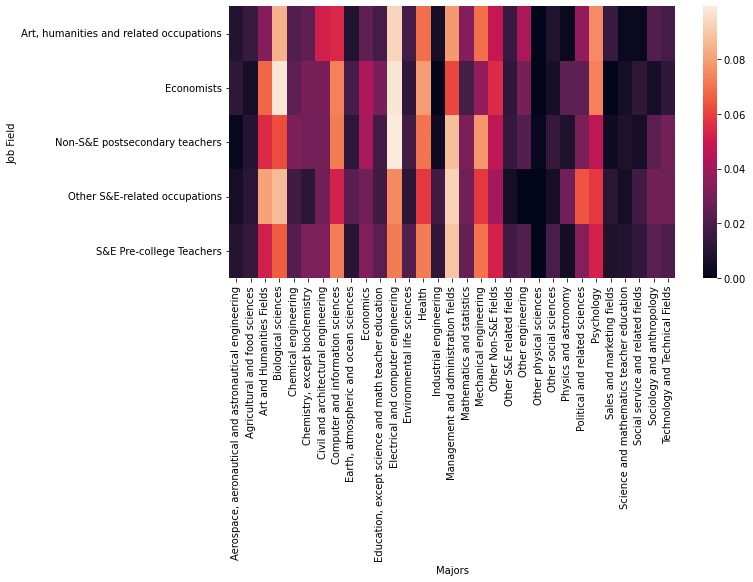

In [73]:
#recode job satisfaction
nscg_bachelor_1['JOBSATIS'] = nscg_bachelor_1['JOBSATIS'].replace(to_replace='Very satisfied', value='1')
nscg_bachelor_1['JOBSATIS'] = nscg_bachelor_1['JOBSATIS'].replace(to_replace='Somewhat satisfied', value='2')
nscg_bachelor_1['JOBSATIS'] = nscg_bachelor_1['JOBSATIS'].replace(to_replace='Somewhat dissatisfied', value='3')
nscg_bachelor_1['JOBSATIS'] = nscg_bachelor_1['JOBSATIS'].replace(to_replace='Very dissatisfied', value='4')

#convert job satisfaction to integer
nscg_bachelor_1['JOBSATIS'] = nscg_bachelor_1['JOBSATIS'].astype(int)

#group data by job field and get mean job satisfaction and mean salary
nscg_bach_agg_2 = nscg_bachelor_1.groupby('N3OCPRNG_D')[['JOBSATIS', 'SALARY']].agg(np.mean)
df_nscg_bach_agg_2 = pd.DataFrame(nscg_bach_agg_2) #convert to dataframe
df_nscg_bach_agg_2 = nscg_bach_agg_2.reset_index() #reset index
df_nscg_bach_agg_2.columns = ['job_field', 'JOBSATIS', 'SALARY'] # change column names

#scatter plot with job satisfaction and salary
plt.figure(figsize=(15,15))
plt.scatter(df_nscg_bach_agg_2['SALARY'], df_nscg_bach_agg_2['JOBSATIS'], alpha=0.40, marker='o', s = 30)
plt.title('Job Satisfaction and Salary')
plt.xlabel("Mean Salary")
plt.ylabel('Mean Job Satisfaction (Note: a lower value indicates higher satisfaction)')
annotations = df_nscg_bach_agg_2['job_field']
for i, label in enumerate(annotations):
    plt.annotate(label, (df_nscg_bach_agg_2['SALARY'][i], df_nscg_bach_agg_2['JOBSATIS'][i]))
plt.axvline(x = 83000, color = "green") # Plotting vertical line 
plt.axhline(y = 1.7, color = "green") # Plotting horizontal line  
plt.show()

#subset data for mean salaries over $84000 and job satisfaction < 1.7
df_sub  = df_nscg_bach_agg_2[(df_nscg_bach_agg_2['SALARY']>=84000) & (df_nscg_bach_agg_2['JOBSATIS']<=1.7)]
df_sub = df_sub.reset_index()

#scatter plot with best pay and job satisfaction
plt.figure(figsize=(5,5))
plt.scatter(df_sub['SALARY'], df_sub['JOBSATIS'], alpha=0.40, marker='o', s = 30)
plt.title('Job Satisfaction and Salary - Mean Salary > $84,000 and Mean Job Satisfaction < 1.7')
plt.xlabel("Mean Salary")
plt.ylabel('Mean Job Satisfaction')
annotations = df_sub['job_field']
for i, label in enumerate(annotations):
    plt.annotate(label, (df_sub['SALARY'][i], df_sub['JOBSATIS'][i])) #automate annotations
plt.show()

#find majors for each of the job fields
fields = ["Art, humanities and related occupations", "Economists", "Non-S&E postsecondary teachers",
          "Other S&E-related occupations", "S&E Pre-college Teachers"]
majors = nscg_bachelor_1[nscg_bachelor_1["N3OCPRNG_D"].isin(fields)]
majors = majors.reset_index()

#strip lead and trailing spaces in NBAMENG_D
majors['NBAMENG_D'] = majors['NBAMENG_D'].str.strip()

#cross tab of job and job satisfaction
ct_majors = pd.crosstab(index = majors.N3OCPRNG_D, columns = majors.NBAMENG_D, 
                       rownames=['Job Field'], colnames=['Majors'], normalize='index')

#heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(ct_majors)
plt.show()




------------------------------------------------------------------------------------------

<p><b>Insights:</b></p>
<p> Putting together job satisfaction with salary allows us to construct a graph with quadrants where the lower right quandrant represents the maximization of job satisfaction and salary. Art, humanities and related occupations, economists, Non-science and engineering postsecondary teachers, other science and engineering-related occupations, and pre-college Teachers are in this quandrant. A heatmap shows the college majors of people employed in these fields. Among the most versatile majors, i.e. the majors that lead to employement in these satisfying and higher paying jobs, are biological sciences, electrical and computer engineering, and managment and administrative fields. Recalling that majors in biological sciences and electrical and computer engineering were among those most likely to get a job in their field, these majors might be the best choices for college students choosing a major.</p>